In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json
import optuna
import plotly
import numpy as np

In [3]:
def learning_curves(dataframe, index):
    data = dataframe.iloc[index]
    history = json.loads(data.history.replace("'",'"'))
    recall = data.recall
    loss = data.loss

    train_recall = history["recall"]
    val_recall = history["val_recall"]
    
    train_loss = history["loss"]
    val_loss = history["val_loss"]

    epochs = range(len(train_loss))
    
    
    # Création du graphique
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    # Axe pour la loss
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss', color='blue')
    ax1.plot(epochs, train_loss, label='Train Loss', color='blue', linestyle='-')
    ax1.plot(epochs, val_loss, label='Validation Loss', color='blue', linestyle='--')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_yticks(np.arange(0, 1.1, 0.1))
    
    
    # Deuxième axe pour l'accuracy
    ax2 = ax1.twinx()
    ax2.set_ylabel('Recall', color='red')
    ax2.plot(epochs, train_recall, label='Train Recall', color='red', linestyle='-')
    ax2.plot(epochs, val_recall, label='Validation Recall', color='red', linestyle='--')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.set_yticks(np.arange(0, 1.1, 0.1))
    
    # Titre et légende
    fig.suptitle('Courbe d\'apprentissage du modèle', fontsize=16)
    fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
    fig.tight_layout()
    plt.grid(True)
    plt.show()


In [4]:
def plot_loss_recall(dataframe,index,best_index):
    data = dataframe.iloc[index]
    history = json.loads(data.history.replace("'",'"'))
    recall = data.recall
    loss = data.loss
    
    data = dataframe.iloc[best_index]
    best_recall = data.recall
    best_loss = data.loss

    train_recall = history["recall"]
    val_recall = history["val_recall"]
    
    train_loss = history["loss"]
    val_loss = history["val_loss"]

    plt.figure(figsize=(8, 6))
    plt.scatter(val_recall, val_loss, marker='o', color='purple', linestyle='-')
    plt.axhline(loss, color='blue',linestyle=':')
    plt.axvline(recall, color='red',linestyle=':')
    plt.axhline(best_loss, color='grey',linestyle=':')
    plt.axvline(best_recall, color='grey',linestyle=':')
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.xticks(np.arange(0, 1.1, 0.1))

    
    # Mise en forme
    plt.xlabel('Validation Recall', color="red")
    plt.ylabel('Validation Loss', color="blue")
    plt.tick_params(axis='y', labelcolor='blue')
    plt.tick_params(axis='x', labelcolor='red')
    plt.title('Validation Loss en fonction du Recall')
    plt.grid(True)
    plt.tight_layout()
    
    plt.show()

In [5]:
columns = ["trial","state","recall","loss","batch_size","dropout_rate","learning_rate","momentum","optimizer","weight_decay","history"]

- resnet_50_1 : 24x24 , clahe
- resnet_50_2 : resnet_preprocessing
- resnet_50_3 : clahe + resnet_preprocessing
- resnet_50_5 : best from resnet_50_2 + unfreeze


In [6]:
candidates = pd.DataFrame(columns=["experimentation","trial","recall","loss"])    

# resnet_50_1

## Taille des images en entrée
50x50x3
## Prétraitement
CLAHE

In [7]:
df = pd.read_csv("../data/resnet50_1.csv",encoding="utf-8", header=0, names=columns)

In [8]:
df_head = df.iloc[:,:-1].sort_values("recall", ascending=False).head(5)
df_head

,trial,state,recall,loss,batch_size,dropout_rate,learning_rate,momentum,optimizer,weight_decay
5,5,COMPLETE,0.800000,0.452690,16,0.296994,0.005009,NaN,Adam,0.000398
6,6,COMPLETE,0.765734,0.459719,64,0.433783,0.001475,NaN,Adam,0.000025
20,20,COMPLETE,0.765734,0.454832,32,0.247934,0.000383,NaN,Adam,0.000005
13,13,COMPLETE,0.762712,0.452072,16,0.328564,0.004096,0.949613,SGD,0.000010
8,8,COMPLETE,0.762238,0.449215,32,0.453019,0.008030,0.806590,SGD,0.000006


In [9]:
candidates.loc[len(candidates)] = ["resnet50_1"]+ list(df_head.iloc[0][["trial","recall","loss"]])

In [10]:
df_head = df.iloc[:,:-1].sort_values("loss", ascending=True).head(5)
df_head

,trial,state,recall,loss,batch_size,dropout_rate,learning_rate,momentum,optimizer,weight_decay
2,2,COMPLETE,0.758741,0.441346,32,0.324897,0.000658,NaN,Adam,0.000794
8,8,COMPLETE,0.762238,0.449215,32,0.453019,0.008030,0.806590,SGD,0.000006
18,18,COMPLETE,0.751748,0.451456,32,0.498501,0.008511,0.818797,SGD,0.000010
13,13,COMPLETE,0.762712,0.452072,16,0.328564,0.004096,0.949613,SGD,0.000010
5,5,COMPLETE,0.800000,0.452690,16,0.296994,0.005009,NaN,Adam,0.000398


In [11]:
candidates.loc[len(candidates)] = ["resnet50_1"]+ list(df_head.iloc[0][["trial","recall","loss"]])

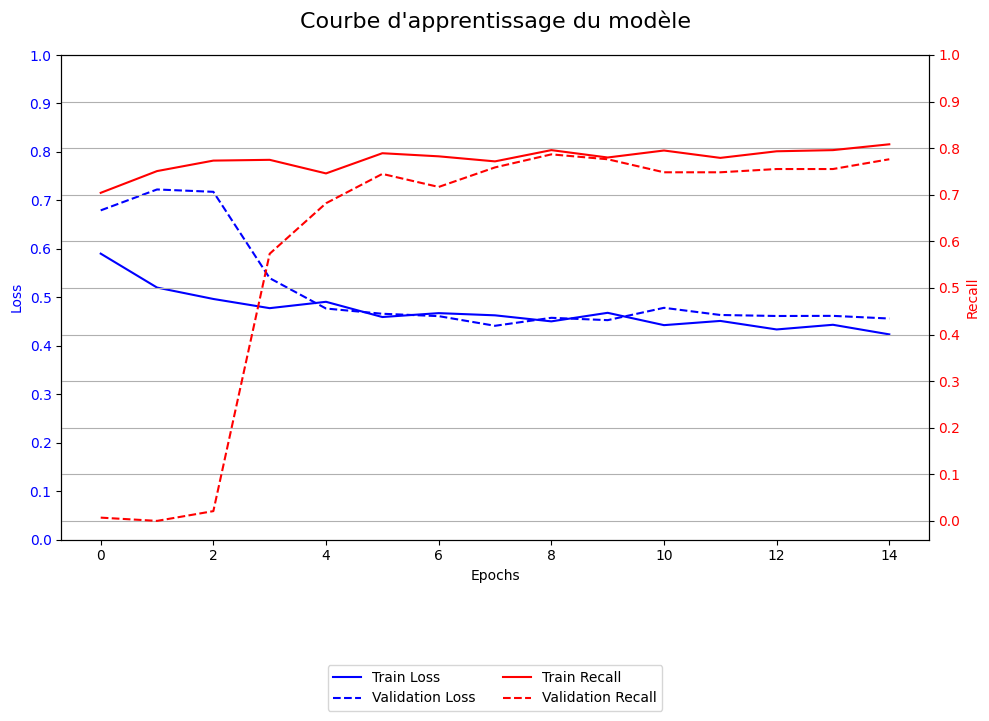

In [12]:
learning_curves(df,2)

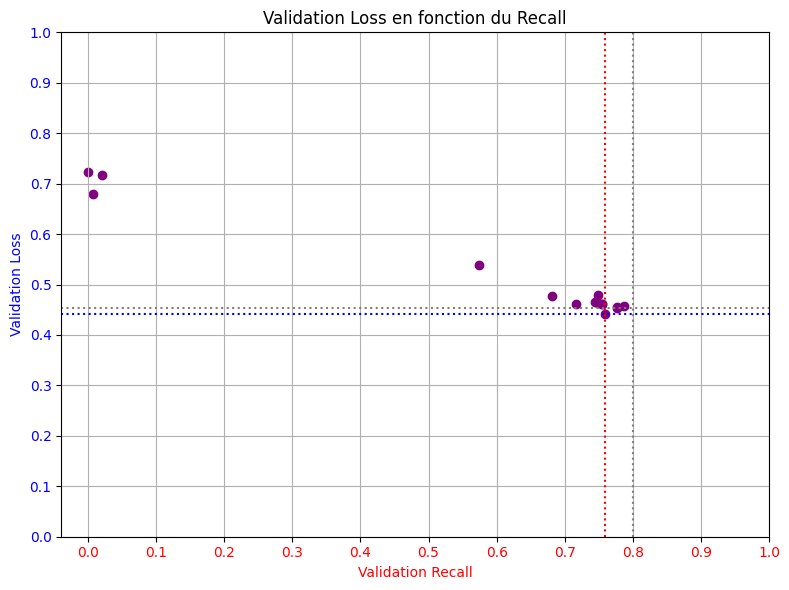

In [13]:
plot_loss_recall(df,2,5)

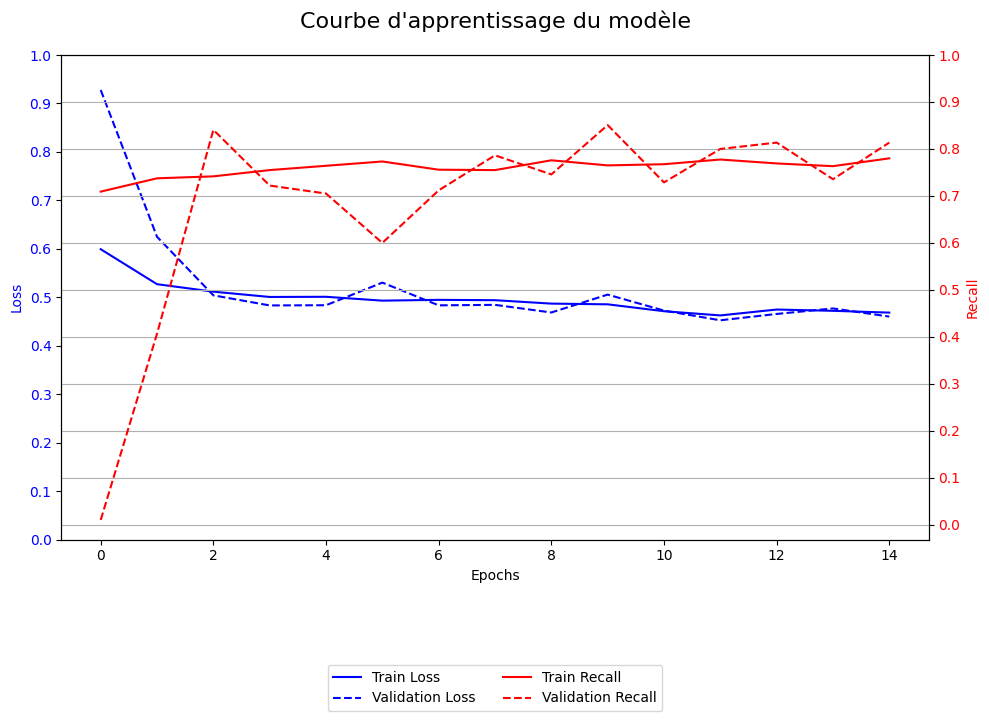

In [14]:
learning_curves(df,5)

In [15]:
candidates

,experimentation,trial,recall,loss
0,resnet50_1,5,0.800000,0.452690
1,resnet50_1,2,0.758741,0.441346


# resnet_50_2

## Taille des imgaes en entrée
224x224x3
## Prétraitement
Préprocessing resnet prépare les images comme elles ont été traitées lors de l'entraînement initial du modèle, sur ImageNet.

Conversion RGB → BGR
OpenCV-style, car les poids ImageNet de ResNet50 attendent ce format.

Soustraction du "mean" BGR d'ImageNet :

Bleu : 103.939

Vert : 116.779

Rouge : 123.68
C’est un centrage (pas une normalisation à [0,1]).

In [16]:
df = pd.read_csv("../data/resnet50_2.csv",encoding="utf-8", header=0, names=columns)

In [17]:
df_head =df.iloc[:,:-1].sort_values("recall", ascending=False).head(5)
df_head

,trial,state,recall,loss,batch_size,dropout_rate,learning_rate,momentum,optimizer,weight_decay
19,19,COMPLETE,0.952542,0.152405,16,0.446487,0.000731,NaN,Adam,0.000002
10,10,COMPLETE,0.949153,0.155574,16,0.441629,0.000280,NaN,Adam,0.000043
3,3,COMPLETE,0.945763,0.154276,16,0.292974,0.001120,NaN,Adam,0.000611
18,18,COMPLETE,0.945763,0.160868,16,0.382873,0.000258,NaN,Adam,0.000009
2,2,COMPLETE,0.937063,0.149066,32,0.228094,0.000457,NaN,Adam,0.000789


In [18]:
candidates.loc[len(candidates)] = ["resnet50_2"]+ list(df_head.iloc[0][["trial","recall","loss"]])

In [19]:
df_head = df.iloc[:,:-1].sort_values("loss", ascending=True).head(5)
df_head

,trial,state,recall,loss,batch_size,dropout_rate,learning_rate,momentum,optimizer,weight_decay
2,2,COMPLETE,0.937063,0.149066,32,0.228094,0.000457,NaN,Adam,0.000789
9,9,COMPLETE,0.926573,0.151898,64,0.231450,0.000237,NaN,Adam,0.000004
19,19,COMPLETE,0.952542,0.152405,16,0.446487,0.000731,NaN,Adam,0.000002
16,16,COMPLETE,0.930070,0.153849,32,0.417719,0.003360,NaN,Adam,0.000440
3,3,COMPLETE,0.945763,0.154276,16,0.292974,0.001120,NaN,Adam,0.000611


In [20]:
candidates.loc[len(candidates)] = ["resnet50_2"]+ list(df_head.iloc[0][["trial","recall","loss"]])

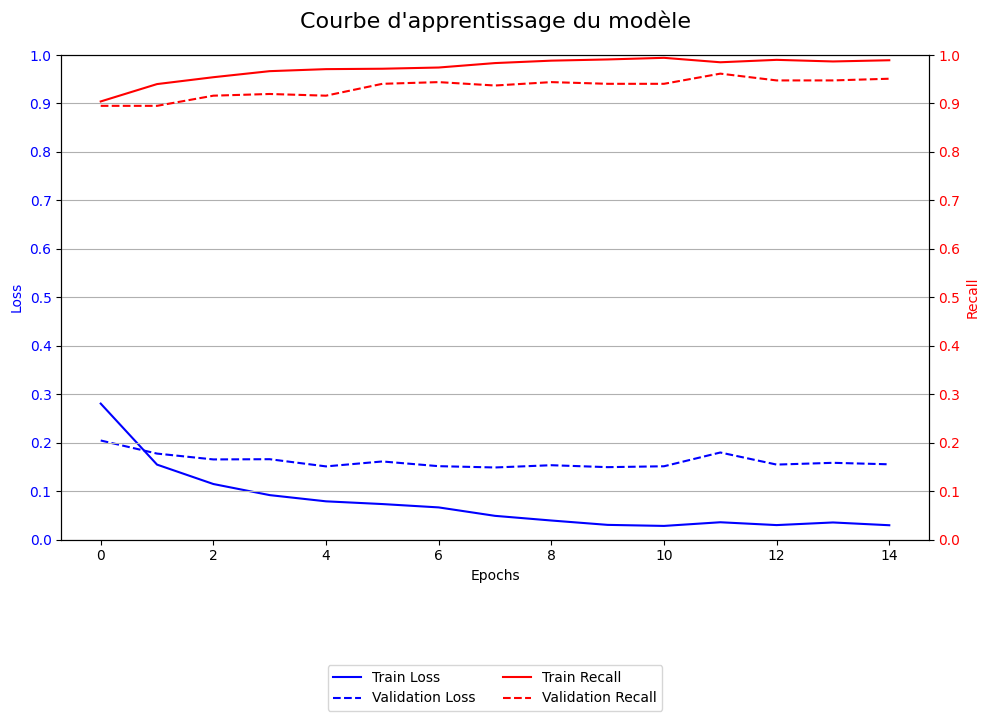

In [21]:
learning_curves(df,2)

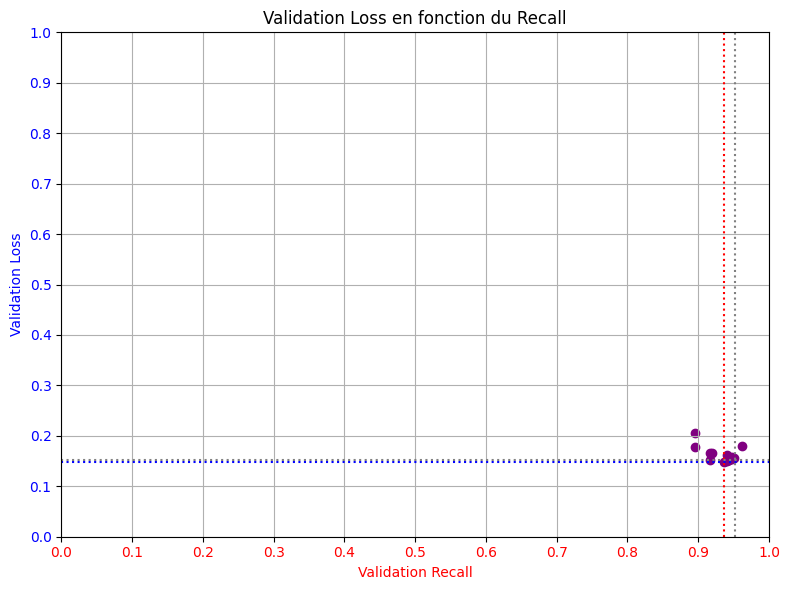

In [22]:
plot_loss_recall(df,2,19)

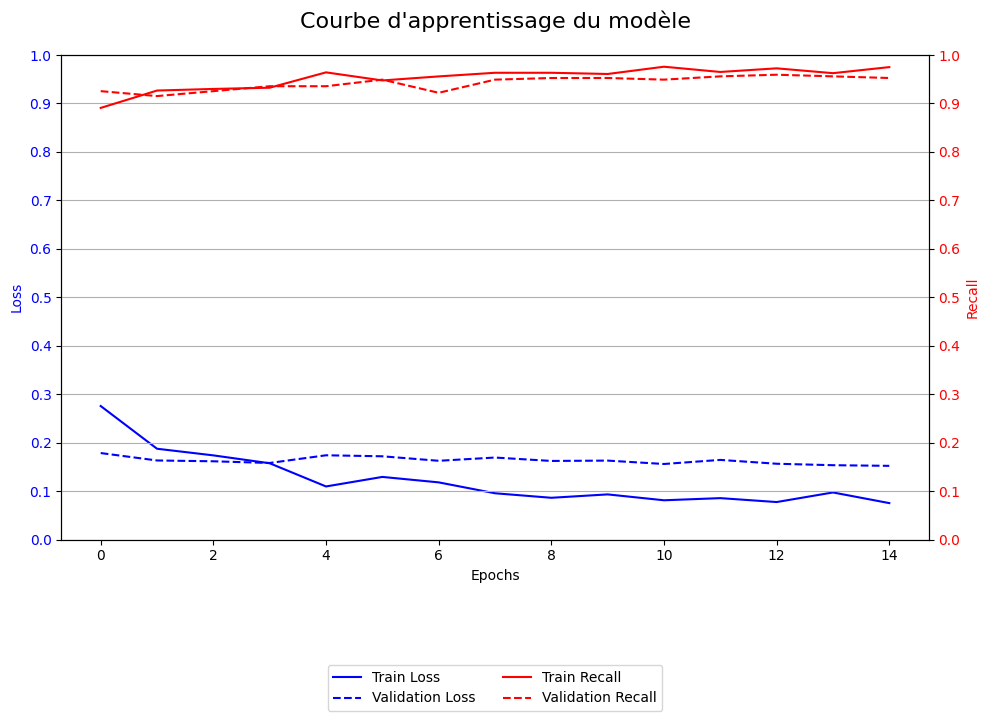

In [23]:
learning_curves(df,19)

In [24]:
candidates.sort_values("recall", ascending=False)

,experimentation,trial,recall,loss
2,resnet50_2,19,0.952542,0.152405
3,resnet50_2,2,0.937063,0.149066
0,resnet50_1,5,0.800000,0.452690
1,resnet50_1,2,0.758741,0.441346


In [25]:
candidates.sort_values("loss")

,experimentation,trial,recall,loss
3,resnet50_2,2,0.937063,0.149066
2,resnet50_2,19,0.952542,0.152405
1,resnet50_1,2,0.758741,0.441346
0,resnet50_1,5,0.800000,0.452690


# resnet_50_3

## Taille des images
224x224x3
## Prétraitements
CLAHE + Préprocessing Resnet.

In [26]:
df = pd.read_csv("../data/resnet50_3.csv",encoding="utf-8", header=0, names=columns)

In [27]:
df_head = df.iloc[:,:-1].sort_values("recall", ascending=False).head(5)
df_head

,trial,state,recall,loss,batch_size,dropout_rate,learning_rate,momentum,optimizer,weight_decay
3,3,COMPLETE,0.937063,0.214731,32,0.261629,0.002315,0.811678,SGD,0.000036
17,17,COMPLETE,0.937063,0.215762,64,0.401793,0.000384,NaN,Adam,0.000246
6,6,COMPLETE,0.932203,0.226313,16,0.344856,0.000511,0.977096,SGD,0.000046
15,15,COMPLETE,0.930070,0.328126,64,0.363617,0.000226,0.819499,SGD,0.000090
4,4,COMPLETE,0.930070,0.209573,64,0.204790,0.000725,NaN,Adam,0.000334


In [28]:
candidates.loc[len(candidates)] = ["resnet50_3"]+ list(df_head.iloc[0][["trial","recall","loss"]])

In [29]:
df_head = df.iloc[:,:-1].sort_values("loss", ascending=True).head(5)
df_head

,trial,state,recall,loss,batch_size,dropout_rate,learning_rate,momentum,optimizer,weight_decay
11,11,COMPLETE,0.919580,0.198574,64,0.490870,0.008840,NaN,Adam,0.000230
2,2,COMPLETE,0.926573,0.204784,32,0.471190,0.004013,0.909751,SGD,0.000001
10,10,COMPLETE,0.926573,0.207172,32,0.348654,0.006091,NaN,Adam,0.000024
4,4,COMPLETE,0.930070,0.209573,64,0.204790,0.000725,NaN,Adam,0.000334
3,3,COMPLETE,0.937063,0.214731,32,0.261629,0.002315,0.811678,SGD,0.000036


In [30]:
candidates.loc[len(candidates)] = ["resnet50_3"]+ list(df_head.iloc[0][["trial","recall","loss"]])

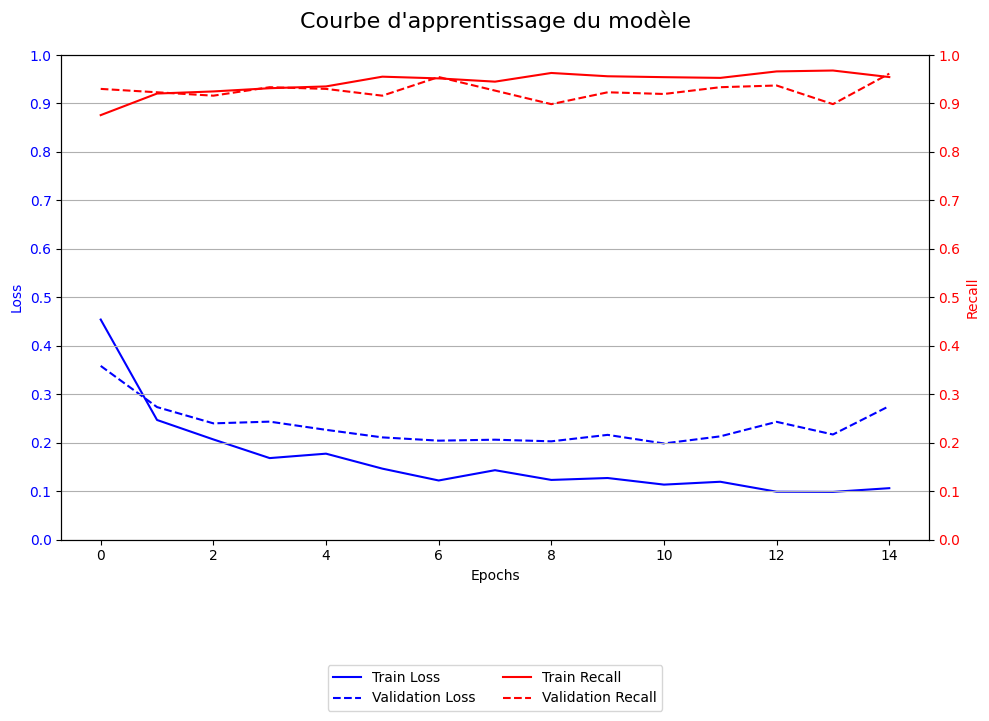

In [31]:
learning_curves(df,11)

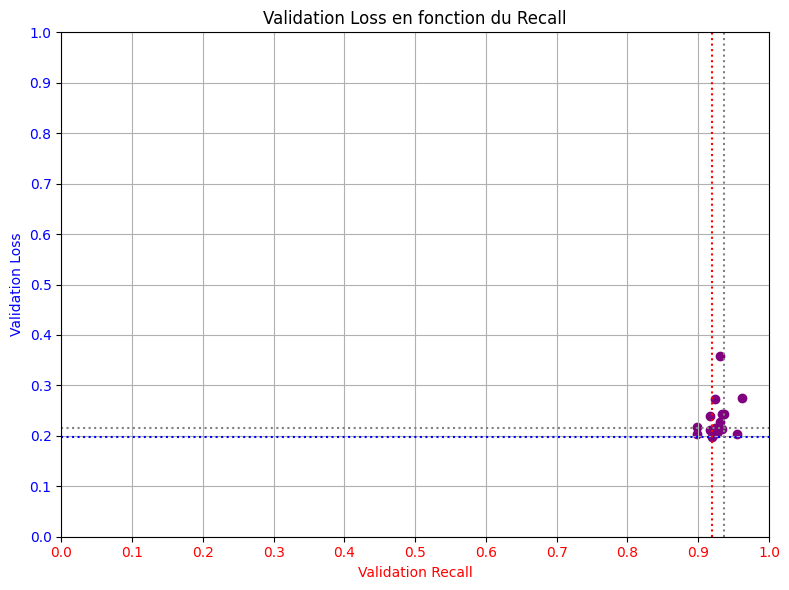

In [32]:
plot_loss_recall(df,11,3)

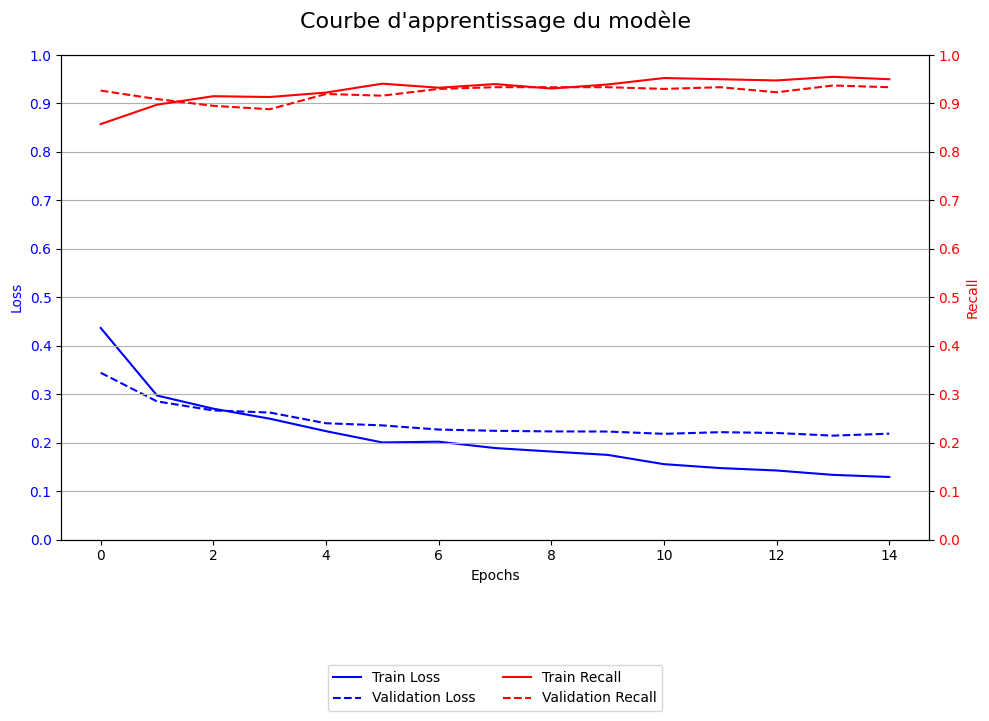

In [33]:
learning_curves(df,3)

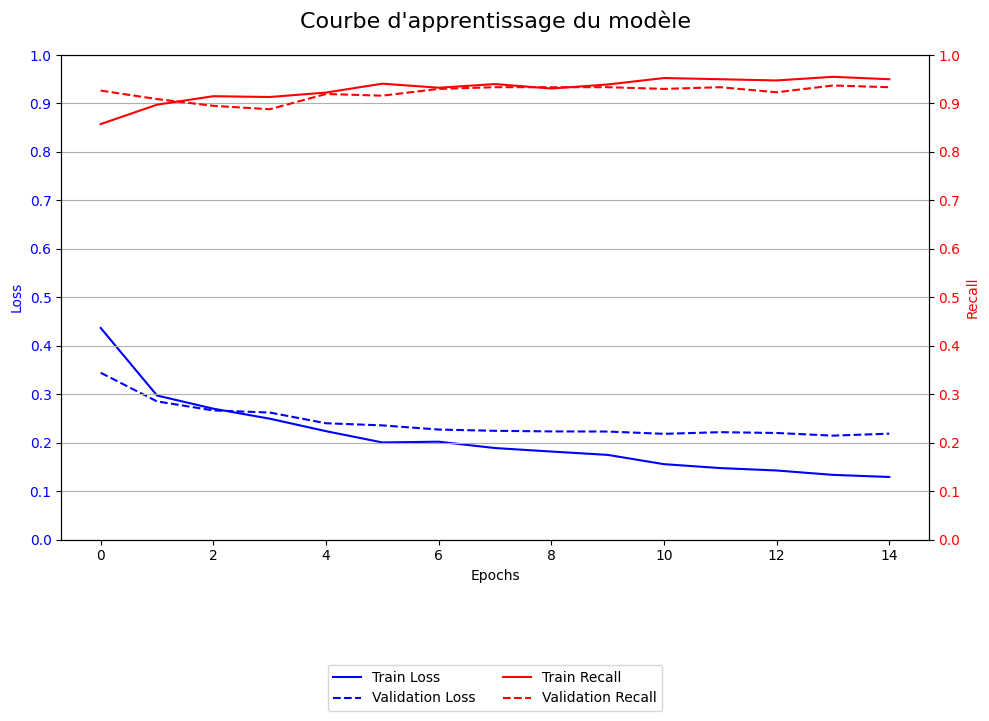

In [34]:
learning_curves(df,3)

In [35]:
candidates.sort_values("recall", ascending=False)

,experimentation,trial,recall,loss
2,resnet50_2,19,0.952542,0.152405
3,resnet50_2,2,0.937063,0.149066
4,resnet50_3,3,0.937063,0.214731
5,resnet50_3,11,0.919580,0.198574
0,resnet50_1,5,0.800000,0.452690
1,resnet50_1,2,0.758741,0.441346


In [36]:
candidates.sort_values("loss")

,experimentation,trial,recall,loss
3,resnet50_2,2,0.937063,0.149066
2,resnet50_2,19,0.952542,0.152405
5,resnet50_3,11,0.919580,0.198574
4,resnet50_3,3,0.937063,0.214731
1,resnet50_1,2,0.758741,0.441346
0,resnet50_1,5,0.800000,0.452690


# resnet_50_5

## Tailles des images et traiteemnt
Mêmes conditions que renet_50_2
## Paramètres
resnet_50_2 trial 19

In [37]:
columns =['trial', 'state', 'recall', 'loss', 'unfrozen_layers','history']

In [38]:
df = pd.read_csv("../data/resnet50_5.csv",encoding="utf-8", header=0, names=columns)

In [39]:
df_head = df.iloc[:,:-1].sort_values("recall", ascending=False).head(5)
df_head

,trial,state,recall,loss,unfrozen_layers
18,18,COMPLETE,0.959322,0.167579,33
9,9,COMPLETE,0.959322,0.158834,21
3,3,COMPLETE,0.955932,0.159021,23
11,11,COMPLETE,0.955932,0.153684,11
7,7,COMPLETE,0.955932,0.181782,17


In [40]:
candidates.loc[len(candidates)] = ["resnet50_5"]+ list(df_head.iloc[0][["trial","recall","loss"]])

In [41]:
df_head = df.iloc[:,:-1].sort_values("loss", ascending=True).head(5)
df_head

,trial,state,recall,loss,unfrozen_layers
10,10,COMPLETE,0.949153,0.150625,19
11,11,COMPLETE,0.955932,0.153684,11
0,0,COMPLETE,0.928814,0.155448,1
13,13,COMPLETE,0.938983,0.156690,1
14,14,COMPLETE,0.925424,0.157339,27


In [42]:
candidates.loc[len(candidates)] = ["resnet50_5"]+ list(df_head.iloc[0][["trial","recall","loss"]])

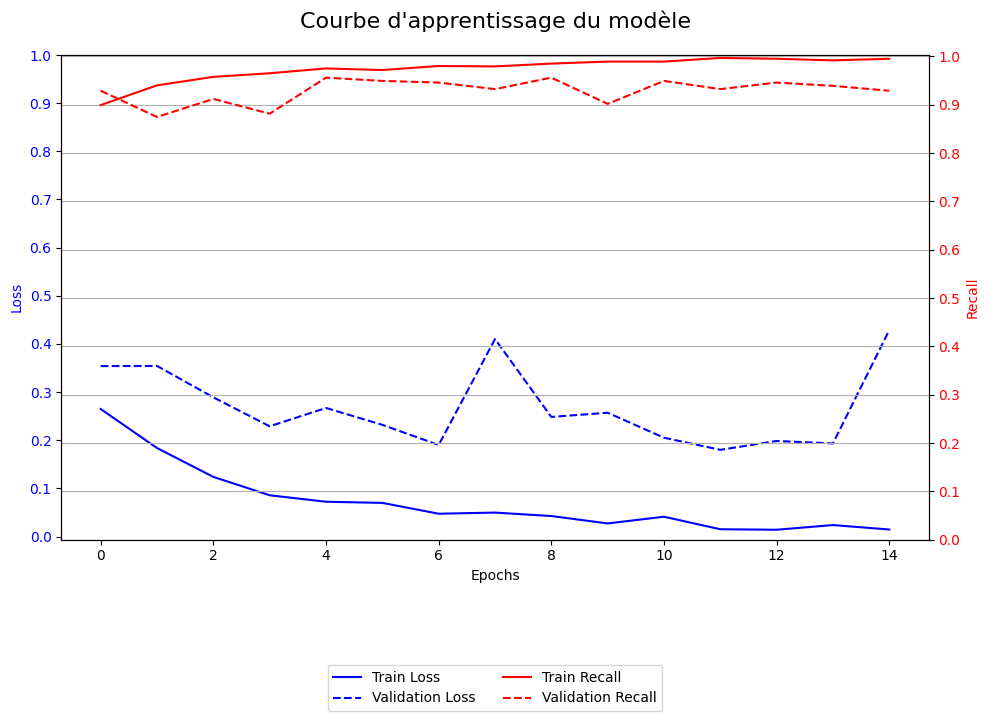

In [43]:
learning_curves(df,2)

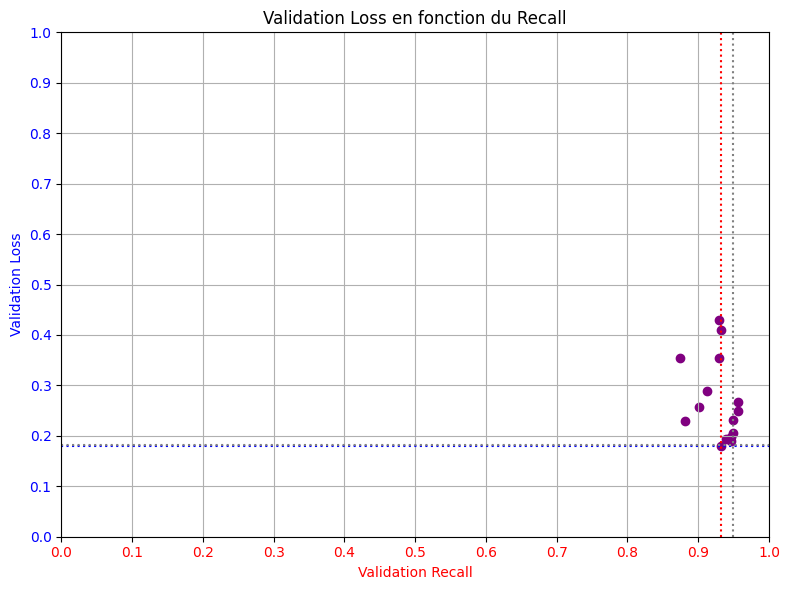

In [44]:
plot_loss_recall(df,2,5)

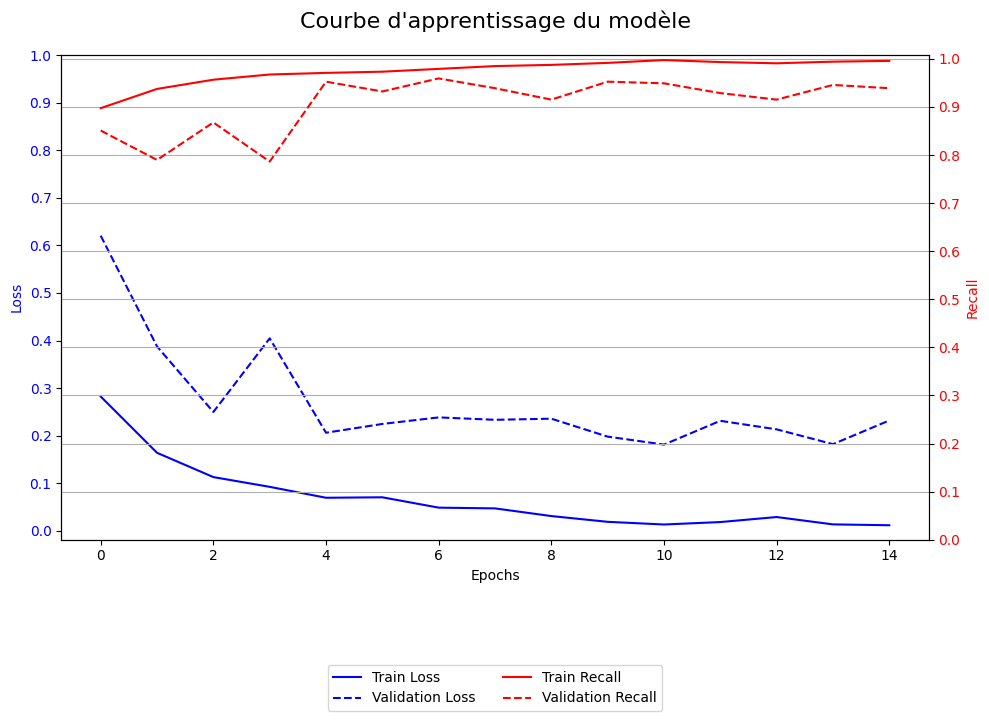

In [45]:
learning_curves(df,5)

In [46]:
candidates.sort_values("recall", ascending=False)

,experimentation,trial,recall,loss
6,resnet50_5,18,0.959322,0.167579
2,resnet50_2,19,0.952542,0.152405
7,resnet50_5,10,0.949153,0.150625
3,resnet50_2,2,0.937063,0.149066
4,resnet50_3,3,0.937063,0.214731
5,resnet50_3,11,0.919580,0.198574
0,resnet50_1,5,0.800000,0.452690
1,resnet50_1,2,0.758741,0.441346


In [47]:
candidates.sort_values("loss")

,experimentation,trial,recall,loss
3,resnet50_2,2,0.937063,0.149066
7,resnet50_5,10,0.949153,0.150625
2,resnet50_2,19,0.952542,0.152405
6,resnet50_5,18,0.959322,0.167579
5,resnet50_3,11,0.919580,0.198574
4,resnet50_3,3,0.937063,0.214731
1,resnet50_1,2,0.758741,0.441346
0,resnet50_1,5,0.800000,0.452690


# Statistiques supplémentaires

In [48]:
from pinkribbon.metrics import MCC
from pinkribbon.dataset import DataGenerator
from keras.applications import ResNet50
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, Callback
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.models import Sequential
from keras.optimizers import Adam

2025-08-04 08:47:43.073744: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-04 08:47:43.504908: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754290063.626355    1892 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754290063.662719    1892 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1754290063.930782    1892 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [49]:
from keras import metrics
from keras import optimizers
from keras import losses

In [50]:
def build_model(dropout_rate, unfrozen):    
    resnet = ResNet50( include_top=False,
                       weights="imagenet",
                       pooling = "avg",
                       name="resnet50")
    
    for layer in resnet.layers[:-unfrozen]:
        layer.trainable = False
    for layer in resnet.layers[-unfrozen:]:
        layer.trainable = True 
    
    model = Sequential()
    model.add(resnet)
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate/2))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [51]:
print("Initializing data generators ", end="")
generator = DataGenerator("../data/BHI.zip", max_samples_per_class=20000, seed=42)
train_generator, val_generator = generator.train_test_split(0.2)
del generator
train_generator.shuffle = True

Initializing data generators 

In [54]:
EPOCHS = 50  # Augmenté pour permettre plus d'apprentissage

# Study resnet50-2 , trial 19
lr = 0.0007307590991963969
batch_size = 16
dropout_rate = 0.4464874858615145
weight_decay = 1.794315918374775e-06
optimizer = Adam(learning_rate=lr, weight_decay=weight_decay)

# Study resnet50_5, trial 18
unfrozen  = 33
    
train_generator.batch_size = batch_size
val_generator.batch_size = batch_size

model = build_model(dropout_rate, unfrozen)
model.compile(optimizer=optimizer, loss=losses.BinaryCrossentropy(name="loss"), metrics=[metrics.Recall(name="recall"),
        metrics.Precision(name="precision")])

es = EarlyStopping( 
    patience=7,  
    restore_best_weights=True,
    verbose=1,
    monitor='val_loss',
    mode='min',
    min_delta=0.001
)
         
rp = ReduceLROnPlateau( 
    factor=0.5,
    patience=4,
    min_lr=1e-7,
    verbose=1,
    monitor='val_loss',
    mode='min'
)

In [55]:
history = model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=EPOCHS,
        verbose=1,
        callbacks=[es, rp])

Epoch 1/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 105s 47ms/step - loss: 0.3749 - precision: 0.8356 - recall: 0.8503 - val_loss: 0.3469 - val_precision: 0.9217 - val_recall: 0.7738 - learning_rate: 7.3076e-04
Epoch 2/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 98s 49ms/step - loss: 0.2903 - precision: 0.8750 - recall: 0.8837 - val_loss: 0.2571 - val_precision: 0.8883 - val_recall: 0.8985 - learning_rate: 7.3076e-04
Epoch 3/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 110s 55ms/step - loss: 0.2656 - precision: 0.8901 - recall: 0.8939 - val_loss: 0.2605 - val_precision: 0.9100 - val_recall: 0.8720 - learning_rate: 7.3076e-04
Epoch 4/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 99s 50ms/step - loss: 0.2373 - precision: 0.9021 - recall: 0.9082 - val_loss: 0.2513 - val_precision: 0.9196 - val_recall: 0.8610 - learning_rate: 7.3076e-04
Epoch 5/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 98s 49ms/step - loss: 0.2041 - precision: 0.9176 - recall: 0.9217 - val_loss: 0.2616 - val_precision: 0.9189 - val_recall: 0.8560 - learning_rate: 7.3076e-0

In [116]:
model.save("best_model.keras")

In [120]:
res = model.evaluate(val_generator)

500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - loss: 0.2377 - precision: 0.8880 - recall: 0.9100


In [112]:
model.metrics_names

['loss', 'compile_metrics']

In [121]:
res

[0.23767046630382538, 0.9100000262260437, 0.8880214691162109]

In [122]:
tmp = pd.DataFrame.from_dict({
        "history": [json.dumps(history.history)],
        "loss": [res[0]],
        "recall": [res[2]]
})

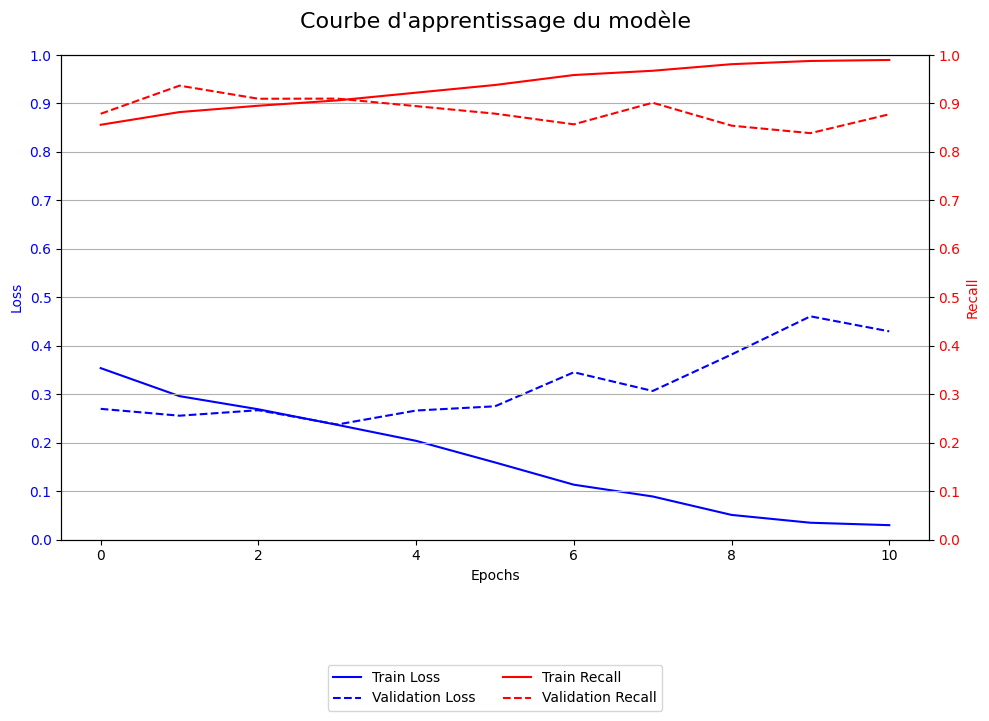

In [123]:
learning_curves(tmp,0)